# Natural Language Processing Project

[Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.iloc[3]['text'][:120]

"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscap"

In [5]:
#need to remove punctuation from text for each data entry and make all text lower case
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
df['text'] = df['text'].str.lower()

In [6]:
'check punctuation removed'
df.iloc[3]['text'][:120]

'rosie dakota and i love chaparral dog park its very convenient and surrounded by a lot of paths a desert xeriscape baseb'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [8]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
#write function to take input from text column, split into a list of words and return the length of the list
def wordcount(text):
    lst = text.split()
    return len(lst)

In [10]:
df['text length'] = df['text'].apply(wordcount)

In [11]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate rice is so good and i also...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,15
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,84


In [12]:
df.iloc[0]['text'].split()[:9] # splits the text into individual words allowing use of len to calculate text length

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for']

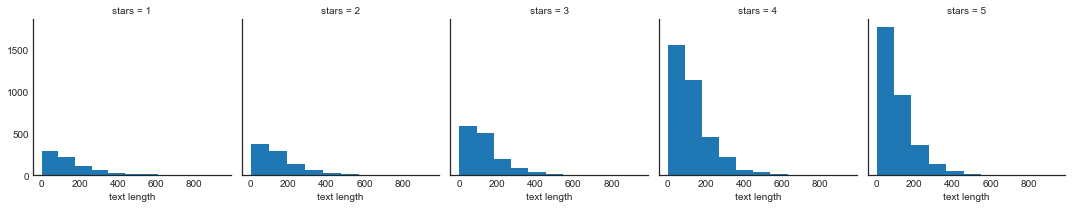

In [13]:
g = sns.FacetGrid(df,col='stars')
g.map(plt.hist,'text length')

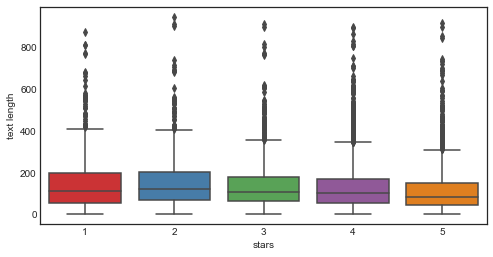

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(x='stars',y='text length',data=df,palette='Set1')

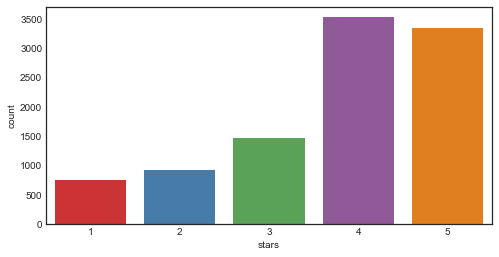

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='stars',data=df,palette='Set1')

In [16]:
stars= df.groupby('stars')[['cool','useful','funny','text length']].mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.407210
2,0.719525,1.563107,0.875944,155.765912
3,0.788501,1.306639,0.694730,140.042437
4,0.954623,1.395916,0.670448,130.496597
5,0.944261,1.381780,0.608631,113.880432


In [17]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.866991
useful,-0.743329,1.000000,0.894506,0.699252
funny,-0.944939,0.894506,1.000000,0.848996
text length,-0.866991,0.699252,0.848996,1.000000


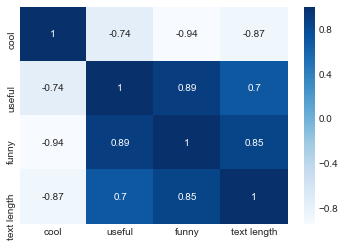

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(stars.corr(),cmap='Blues',annot=True)

In [19]:
yelp_class = df[(df['stars']==1) | (df['stars']==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,84
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what youre doing and drive here after i a...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,292


In [20]:
X = yelp_class['text']
y = yelp_class['stars']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer()
X = c_vec.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

First let's try to model the data using a Naive Bayes classifier model.

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred = nb.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.84      0.64      0.73       138
          5       0.93      0.97      0.95       680

avg / total       0.92      0.92      0.91       818

[[ 89  49]
 [ 17 663]]


Categorisation accuracy is 93%, which is fairly good. The model does seem to perform considerably more accurately on the 5 star reviews than the 1 star reviews. Let's try a Random Forest Classifier next. 

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          1       1.00      0.20      0.33       138
          5       0.86      1.00      0.92       680

avg / total       0.88      0.86      0.82       818

[[ 27 111]
 [  0 680]]


Random forest classifier seems to be extremely biased towards the 5 star reviews. It classifies 100% of the 5 star reviews correctly but also falsly classifies 80% of the 1 star reviews as 5 star. Let's try a logistic regression model.

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.85      0.73      0.79       138
          5       0.95      0.97      0.96       680

avg / total       0.93      0.93      0.93       818

[[101  37]
 [ 18 662]]


The logistic regression model gives the best accuracy so far, with 93% of the reviews correctly classified. This model also gives a better balance of incorrect classifications between the two classes.

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.77      0.14      0.24       138
          5       0.85      0.99      0.92       680

avg / total       0.84      0.85      0.80       818

[[ 20 118]
 [  6 674]]


The KNN model with 3 nearest neighbours appears to have a strong classification bias towards 5 star. A simple logistic regression model seems to give the best predictions for this data set. 